In [170]:
# !pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /private/var/folders/73/dfnlcqg57w7btn76pt1r17cm0000gp/T/pip-install-05lpeeup/twint_99fbac0bb6064cd687fe5d0328094cf6
  Running command git clone -q https://github.com/twintproject/twint.git /private/var/folders/73/dfnlcqg57w7btn76pt1r17cm0000gp/T/pip-install-05lpeeup/twint_99fbac0bb6064cd687fe5d0328094cf6
  Running command git checkout -q origin/master
  Resolved https://github.com/twintproject/twint.git to commit origin/master


In [171]:
import pandas as pd
import twint
import re
import requests
import nest_asyncio
from textblob import TextBlob
nest_asyncio.apply()
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
candidate_name={'Peter Obi':'Obidients',
    'Bola Ahmed Tinubu':'BAT',
    'Atiku Abubakar':'Atiku'}

In [173]:
def twintConfig(search_string):
    c = twint.Config()
    c.Search = search_string[1]
    c.Limit=500
    c.Lang = 'en'
    c.Pandas = True
    c.Pandas_au = True          
    c.Pandas_clean=True
    c.Since='2022-01-01'
    c.Until='2022-12-31'
    twint.run.Search(c)

In [174]:
def Run_Twint(search_vals):
    
    #set empty dataframe for join
    out_df= pd.DataFrame()
    
    for candidate in search_vals.items():
        print ("running for search item: "+candidate[0]+"\n")
        print ("Search string: "+candidate[1]+"\n")
        
        #run twint
        twintConfig(candidate)
        
        #get dataframe
        df_all = twint.storage.panda.Tweets_df
        
        #join Dataframes and create 'Bank' column
        df_all["Candidate"]= candidate[0]
        out_df = pd.concat([out_df,df_all])
        
    return out_df

In [217]:
# df_all = Run_Twint(candidate_name)

In [218]:
pd.set_option('display.max_rows', 10000)

In [219]:
pd.set_option('display.max_columns', 10000)

In [220]:
pd.set_option('display.max_colwidth', None)

In [221]:
df_all.head(1)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Candidate
0,1603905136904003584,1603849521699913728,1.671236e+12,2022-12-17 01:09:18,+0100,,@chymaker @atiku Money money money .they don't care They are after their pockets,en,[],[],2201017550,2201017550,drSamAlli,Ngolo Kante of Obidients,6,01,https://twitter.com/drSamAlli/status/1603905136904003584,[],[],0,,False,0,0,0,,Obidients,,,,,,,"[{'screen_name': 'chymaker', 'name': 'Baron Chymaker.𝛑', 'id': '1473367200950063105'}, {'screen_name': 'atiku', 'name': 'Atiku Abubakar', 'id': '177583133'}]",,,,,Peter Obi


## Making a Copy of the Dataset

In [222]:
#making a copy
df = df_all.copy()

## Data Cleaning

In [223]:
#accessing the twint information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 226
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1264 non-null   object 
 1   conversation_id  1264 non-null   object 
 2   created_at       1264 non-null   float64
 3   date             1264 non-null   object 
 4   timezone         1264 non-null   object 
 5   place            1264 non-null   object 
 6   tweet            1264 non-null   object 
 7   language         1264 non-null   object 
 8   hashtags         1264 non-null   object 
 9   cashtags         1264 non-null   object 
 10  user_id          1264 non-null   int64  
 11  user_id_str      1264 non-null   object 
 12  username         1264 non-null   object 
 13  name             1264 non-null   object 
 14  day              1264 non-null   int64  
 15  hour             1264 non-null   object 
 16  link             1264 non-null   object 
 17  urls           

In [224]:
#the description of the twint 
df.describe()

,created_at,user_id,day,video,nlikes,nreplies,nretweets
count,1.264000e+03,1.264000e+03,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,1.671226e+12,9.037656e+17,5.606013,0.154272,9.452532,1.821994,3.146361
std,1.270718e+07,6.464863e+17,0.488825,0.361352,88.249588,39.875330,30.645754
min,1.671193e+12,2.768501e+06,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1.671216e+12,2.555267e+09,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.671234e+12,1.156208e+18,6.000000,0.000000,0.000000,0.000000,0.000000
75%,1.671235e+12,1.492039e+18,6.000000,0.000000,1.000000,0.000000,0.000000
max,1.671236e+12,1.603905e+18,6.000000,1.000000,1896.000000,1379.000000,653.000000


In [225]:
#droping rows which languange =! english
df["language"].unique()

array(['en', 'fr', 'zxx', 'ht', 'tl', 'und', 'qht', 'qme', 'eu', 'qam',
       'cs', 'in', 'hi', 'pt', 'ca', 'ja', 'vi', 'tr', 'it', 'ar', 'es',
       'art', 'ko', 'ro', 'ru', 'qst', 'no', 'pl', 'lt', 'sv', 'lv', 'is',
       'sl'], dtype=object)

In [226]:
#language that contains only english
df = df[df["language"].isin(['en'])]

In [227]:
df.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Candidate
0,1603905136904003584,1603849521699913728,1.671236e+12,2022-12-17 01:09:18,+0100,,@chymaker @atiku Money money money .they don't care They are after their pockets,en,[],[],2201017550,2201017550,drSamAlli,Ngolo Kante of Obidients,6,01,https://twitter.com/drSamAlli/status/1603905136904003584,[],[],0,,False,0,0,0,,Obidients,,,,,,,"[{'screen_name': 'chymaker', 'name': 'Baron Chymaker.𝛑', 'id': '1473367200950063105'}, {'screen_name': 'atiku', 'name': 'Atiku Abubakar', 'id': '177583133'}]",,,,,Peter Obi
1,1603903819330510848,1603856646253469707,1.671235e+12,2022-12-17 01:04:04,+0100,,@PeterObi May the soul of Hon. Christopher Elaghu and the soul of all the fallen OBIdients rest in peace 🙏. Their death would not be in vain.,en,[],[],1543521331848876033,1543521331848876033,Ru4us6,Front-linner,6,01,https://twitter.com/Ru4us6/status/1603903819330510848,[],[],0,,False,0,0,0,,Obidients,,,,,,,"[{'screen_name': 'PeterObi', 'name': 'Peter Obi', 'id': '1050779471731707904'}]",,,,,Peter Obi


In [228]:
#the shape of the datset
df.shape

(975, 39)

In [229]:
#dropping unnecessary columns
df = df.drop(['id', 'conversation_id', 'timezone', 'place', 'cashtags', 'language', 'name', 'search', 'hashtags','user_id', 'day', 'hour', 'created_at', 'user_id_str', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet','nreplies', 'nretweets', 'quote_url', 'near', 'geo', 'source',  'username', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],axis = 1)

In [230]:
#checking null values
df.isnull().sum()


date         0
tweet        0
nlikes       0
Candidate    0
dtype: int64

In [231]:
#the get the count of duplicated rows
df_1 = df.duplicated().value_counts()
df_1

False    975
dtype: int64

In [232]:
#using regular expression to remove the signs, links, hastags, non_alphabet etc
def clean_text(text):  
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip() 

In [233]:
pat1 = r'@[^ ]+'                   #@signs
pat2 = r'https?://[A-Za-z0-9./]+'  #links
pat3 = r'\'s'                      #floating s's
pat4 = r'\#\w+'                     # hashtags
pat5 = r'&amp '
pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))

In [234]:
combined_pat

"@[^ ]+|https?://[A-Za-z0-9./]+|\\'s|\\#\\w+|&amp |[^A-Za-z\\s]"

In [235]:
#applying the regular expression cleaning
df['tweet'] = df['tweet'].apply(clean_text)

In [236]:
#keeping it in a new dataframe
df_result = df.drop_duplicates()

In [237]:
df_result1 = df_result.copy()

In [238]:
#keeping it in a dataframe
df_result1.head(2)

,date,tweet,nlikes,Candidate
0,2022-12-17 01:09:18,money money money they dont care they are after their pockets,0,Peter Obi
1,2022-12-17 01:04:04,may the soul of hon christopher elaghu and the soul of all the fallen obidients rest in peace their death would not be in vain,0,Peter Obi


In [239]:
print("Running sentiment process")
# creating two new columns(polarity and subjectivity)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#applying the subjectivity and polarity function
df_result1["Subjectivity"] = df_result1['tweet'].apply(getSubjectivity)
df_result1["Polarity"] = df_result1['tweet'].apply(getPolarity)

Running sentiment process


In [240]:
#seeig a sample of the result
df_result1.sample()

,date,tweet,nlikes,Candidate,Subjectivity,Polarity
165,2022-12-17 00:35:51,they bringing in fulani people that will vote for atiku funny enough revolution is awaiting them,0,Atiku Abubakar,0.75,0.125


In [241]:
#function to determine the positive, negative and neutral sentiments
def getAnalysis(text):
    if text < 0:
        return 'negative'
    elif text == 0:
        return 'neutral'
    else:
        return 'positive'
           

In [242]:
df_result1['Analysis'] = df_result1['Polarity'].apply(getAnalysis)

In [243]:
df_result1.head(4)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-17 01:09:18,money money money they dont care they are after their pockets,0,Peter Obi,0.0,0.0,neutral
1,2022-12-17 01:04:04,may the soul of hon christopher elaghu and the soul of all the fallen obidients rest in peace their death would not be in vain,0,Peter Obi,0.0,0.0,neutral
2,2022-12-17 01:00:38,so peter obi and obidients are on a suicide mission abi,0,Peter Obi,0.0,0.0,neutral
3,2022-12-17 00:55:08,i appreciate all obidients for all they have done amp still doingappreciating for making us have hope again in nigeria dear obidients this fight for nigeria soul you all have done well please keep spreading the good word of peter obi,1,Peter Obi,0.6,0.7,positive


In [244]:
#locating all Peter_obi's sentiment
Peter_Obi = df_result1.loc[df_result1['Candidate'] == 'Peter Obi']
Peter_Obi.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-17 01:09:18,money money money they dont care they are after their pockets,0,Peter Obi,0.0,0.0,neutral
1,2022-12-17 01:04:04,may the soul of hon christopher elaghu and the soul of all the fallen obidients rest in peace their death would not be in vain,0,Peter Obi,0.0,0.0,neutral
2,2022-12-17 01:00:38,so peter obi and obidients are on a suicide mission abi,0,Peter Obi,0.0,0.0,neutral
3,2022-12-17 00:55:08,i appreciate all obidients for all they have done amp still doingappreciating for making us have hope again in nigeria dear obidients this fight for nigeria soul you all have done well please keep spreading the good word of peter obi,1,Peter Obi,0.6,0.7,positive
4,2022-12-17 00:53:56,obidients are colllecting pvc you dy here dy talk rubbish its not by making noise online you will see something,0,Peter Obi,0.0,0.0,neutral


In [245]:
#Peter Obi Analysis Count
AnalysisCount_PeterObi= Peter_Obi['Analysis'].groupby(Peter_Obi['Analysis']).size().reset_index(name='counts')
AnalysisCount_PeterObi

,Analysis,counts
0,negative,117
1,neutral,185
2,positive,199


In [246]:
#locating all BAT's sentiment
BAT = df_result1.loc[df_result1['Candidate'] == 'Bola Ahmed Tinubu']
BAT.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-17 01:11:20,grizz needed to fill a lot of paperwork about what happen to that last boat they ever used for shifts,0,Bola Ahmed Tinubu,0.066667,0.000000,neutral
1,2022-12-17 01:11:19,thats what my mother said he eats bats you cant go i cried and cried,0,Bola Ahmed Tinubu,0.000000,0.000000,neutral
2,2022-12-17 01:11:13,the albert sensor systems how government and a c tracks realtime election data in of the us put into effect by dhs after trump won in,0,Bola Ahmed Tinubu,0.000000,0.000000,neutral
6,2022-12-17 01:11:10,australia win the toss amp put south africa into bat at the gabba coverage is live on sports extra amp with the first ball at commentary team includes amp,0,Bola Ahmed Tinubu,0.333333,0.296591,positive
7,2022-12-17 01:11:09,honestly a good bat but is ugly and has bad vibes,0,Bola Ahmed Tinubu,0.755556,-0.233333,negative


In [247]:
#BAT Analysis Count
AnalysisCount_BAT= BAT['Analysis'].groupby(BAT['Analysis']).size().reset_index(name='counts')
AnalysisCount_BAT

,Analysis,counts
0,negative,54
1,neutral,109
2,positive,119


In [248]:
#locating all Atiku's sentiment
Atiku_Abubakar = df_result1.loc[df_result1['Candidate'] == 'Atiku Abubakar']
Atiku_Abubakar.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-17 01:11:34,atiku should rather step down for him must he be the president before you give him state burial,0,Atiku Abubakar,0.288889,-0.155556,negative
1,2022-12-17 01:11:00,igbos dont want igbo presidency but a good president igbos would vote atiku ahead of rochas,0,Atiku Abubakar,0.600000,0.700000,positive
2,2022-12-17 01:10:31,just block the hungry dogg it their akpiri ogologo that is bringing this kind of insults who is atiku feeding in this nigeria that he would have this kind of insolence up his sleeves all because of election,0,Atiku Abubakar,0.900000,0.600000,positive
4,2022-12-17 01:10:13,not everyone atiku dollars can buy,0,Atiku Abubakar,0.000000,0.000000,neutral
5,2022-12-17 01:09:41,wow really mention things you love about atiku and all you could mention was peter obi must really be divine,0,Atiku Abubakar,0.500000,0.250000,positive


In [249]:
#Atiku Analysis Count
AnalysisCount_AtikuAbubakar= Atiku_Abubakar['Analysis'].groupby(Atiku_Abubakar['Analysis']).size().reset_index(name='counts')
AnalysisCount_AtikuAbubakar

,Analysis,counts
0,negative,38
1,neutral,66
2,positive,88


In [250]:
#grouping all candidates
the_candidates = df_result1.loc[df_result1['Analysis'] == 'positive']
the_candidates.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
3,2022-12-17 00:55:08,i appreciate all obidients for all they have done amp still doingappreciating for making us have hope again in nigeria dear obidients this fight for nigeria soul you all have done well please keep spreading the good word of peter obi,1,Peter Obi,0.600000,0.700000,positive
6,2022-12-17 00:38:55,good works hope yall staying safe out therethese unwarranted attacks on lp obidients nationwide is becoming worrisome day after day god bless everyone in and outside po pcc list amen,3,Peter Obi,0.500000,0.412500,positive
8,2022-12-17 00:36:19,he needs more penetration rural support no nau when obidients say we will shock you when obidients say plateau in the bag edo in the bag rivers in the bag kaduna in the bag anambra in the bag i thought they had penetrated everywhere already,1,Peter Obi,0.250000,0.250000,positive
10,2022-12-17 00:32:03,lol in your shallow mind you think it just obidients his party faithfuls in apga who have a candidate from anambra also heard him loud and clear and i can assure you they got the memo and will serve him his due wage,0,Peter Obi,0.551667,0.108333,positive
12,2022-12-17 00:23:36,creativity unbound obidients watch enjoy it,0,Peter Obi,0.500000,0.400000,positive


In [251]:
#positive sentiments counts for all candidates
all_candidates = the_candidates['Candidate'].groupby(the_candidates['Candidate']).size().reset_index(name='counts')
all_candidates

,Candidate,counts
0,Atiku Abubakar,88
1,Bola Ahmed Tinubu,119
2,Peter Obi,199


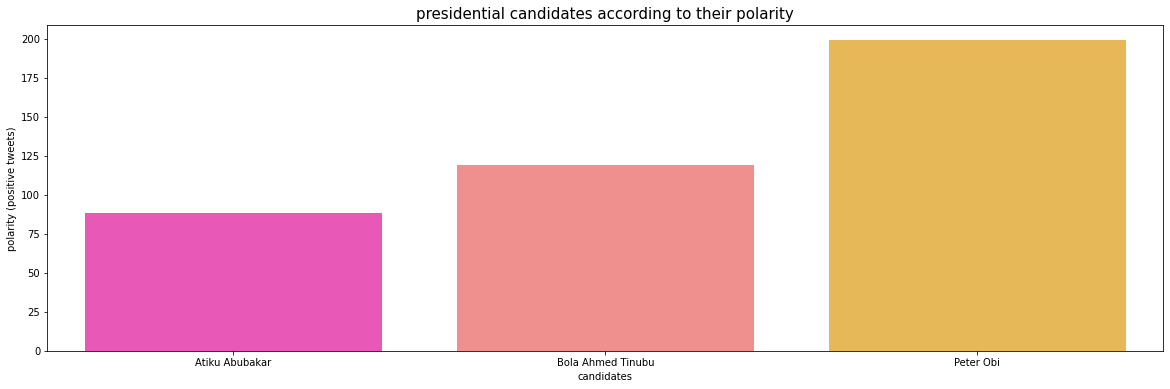

In [252]:
#plotting the results
plt.figure(figsize=(20,6))
sns.barplot(data = all_candidates, x= 'Candidate', y ='counts', palette = 'spring')

#setting the properties for the chart
plt.title('presidential candidates according to their polarity', fontsize = 15 ) 
plt.xlabel('candidates')
plt.ylabel('polarity (positive tweets)')

#saving the chart
plt.show()

In [253]:
#saving the dataframe to csv
df_result1.to_csv('sentiment.csv')